In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocket
from sktime.transformations.panel.rocket import Rocket
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc

In [5]:
cat_train=pd.read_csv('RavdessAudioOnlyNumpy__Y_train.csv')
cat_test=pd.read_csv('RavdessAudioOnlyNumpy__Y_test.csv')
y_train=cat_train['emotion']
y_test=cat_test['emotion']

In [3]:
x_train_saxs=np.load('X_train_sax_small.npy')
x_test_saxs=np.load('X_test_sax_small.npy')
x_train_saxsEmb=x_train_saxs.reshape(1828,1,100)
x_test_saxsEmb=x_test_saxs.reshape(624,1,100)

'''rocket = Rocket(num_kernels=1000)
rocket.fit(x_train_saxsEmb)
X_train_transform = rocket.transform(x_train_saxsEmb)
X_test_transform=rocket.transform(x_test_saxsEmb)

clf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
clf_R.fit(X_train_transform, y_train)

print(classification_report(y_test, clf_R.predict(X_test_transform)))'''

'rocket = Rocket(num_kernels=1000)\nrocket.fit(x_train_saxsEmb)\nX_train_transform = rocket.transform(x_train_saxsEmb)\nX_test_transform=rocket.transform(x_test_saxsEmb)\n\nclf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) \nclf_R.fit(X_train_transform, y_train)\n\nprint(classification_report(y_test, clf_R.predict(X_test_transform)))'

In [6]:
train_accR=[]
test_accR=[]

i=1
for kernels in np.linspace(10,10000,25):
    rocket=Rocket(num_kernels=kernels)
    rocket.fit(x_train_saxsEmb)
    print(f'{i}/25 rocket fit done                 {kernels} kernels')
    X_trainsformR=rocket.transform(x_train_saxsEmb)
    X_testformR=rocket.transform(x_test_saxsEmb)
    print(f'{i}/25 rocket transformations done')
    clf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
    clf_R.fit(X_trainsformR, y_train)
    print(f'{i}/25 model fit done')
    train_accR.append(accuracy_score(y_test, clf_R.predict(X_testformR)))
    test_accR.append(accuracy_score(y_train,clf_R.predict(X_trainsformR)))
    print(f'{i}/25 results appending done\n---------------------------------------------------')
    i+=1


1/25 rocket fit done                 10.0 kernels
1/25 rocket transformations done
1/25 model fit done
1/25 results appending done
---------------------------------------------------
2/25 rocket fit done                 426.25 kernels
2/25 rocket transformations done
2/25 model fit done
2/25 results appending done
---------------------------------------------------
3/25 rocket fit done                 842.5 kernels
3/25 rocket transformations done
3/25 model fit done
3/25 results appending done
---------------------------------------------------
4/25 rocket fit done                 1258.75 kernels
4/25 rocket transformations done
4/25 model fit done
4/25 results appending done
---------------------------------------------------
5/25 rocket fit done                 1675.0 kernels
5/25 rocket transformations done
5/25 model fit done
5/25 results appending done
---------------------------------------------------
6/25 rocket fit done                 2091.25 kernels
6/25 rocket transformati

In [7]:
kernel=list(np.linspace(10,10000,25))
my_kernels=[int(el)for el in kernel]

In [8]:
## MiniRocket

train_accMR =[0]
test_accMR=[0]

i=2
for k in my_kernels[1:]:
    minirocket=MiniRocket(num_kernels=k)
    minirocket.fit(x_train_saxsEmb)
    print(f'{i}/25 minirocket fit done                      {k} kernels')
    
    X_trainsformMR=minirocket.transform(x_train_saxsEmb)
    X_testformMR=minirocket.transform(x_test_saxsEmb)
    print(f'{i}/25 minirocket transformations done')
    
    clf_MR=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
    clf_MR.fit(X_trainsformMR, y_train)
    print(f'{i}/25 model fit done')
    
    test_accMR.append(accuracy_score(y_test, clf_MR.predict(X_testformMR)))
    train_accMR.append(accuracy_score(y_train,clf_MR.predict(X_trainsformMR)))
    print(f'{i}/25 results appending done\n---------------------------------------------------')
    i+=1

2/25 minirocket fit done                      426 kernels
2/25 minirocket transformations done
2/25 model fit done
2/25 results appending done
---------------------------------------------------
3/25 minirocket fit done                      842 kernels
3/25 minirocket transformations done
3/25 model fit done
3/25 results appending done
---------------------------------------------------
4/25 minirocket fit done                      1258 kernels
4/25 minirocket transformations done
4/25 model fit done
4/25 results appending done
---------------------------------------------------
5/25 minirocket fit done                      1675 kernels
5/25 minirocket transformations done
5/25 model fit done
5/25 results appending done
---------------------------------------------------
6/25 minirocket fit done                      2091 kernels
6/25 minirocket transformations done
6/25 model fit done
6/25 results appending done
---------------------------------------------------
7/25 minirocket fit do

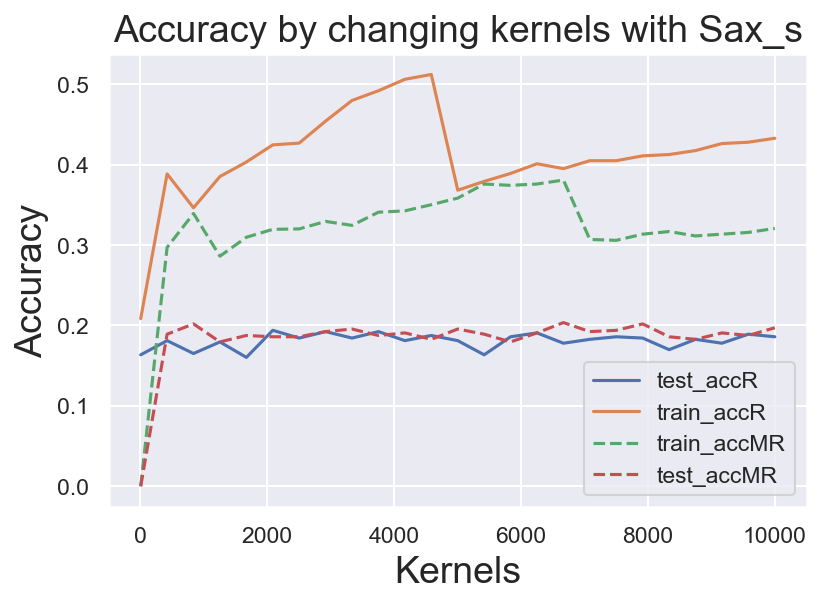

In [9]:
plt.rcParams['figure.dpi']=150
sns.set()
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.plot(my_kernels,train_accR, label='test_accR')
plt.plot(my_kernels,test_accR, label='train_accR')
plt.plot(my_kernels,train_accMR, label='train_accMR' , linestyle="--")
plt.plot(my_kernels, test_accMR, label='test_accMR', linestyle="--")
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.title('Accuracy by changing kernels with Sax_s')
plt.legend()

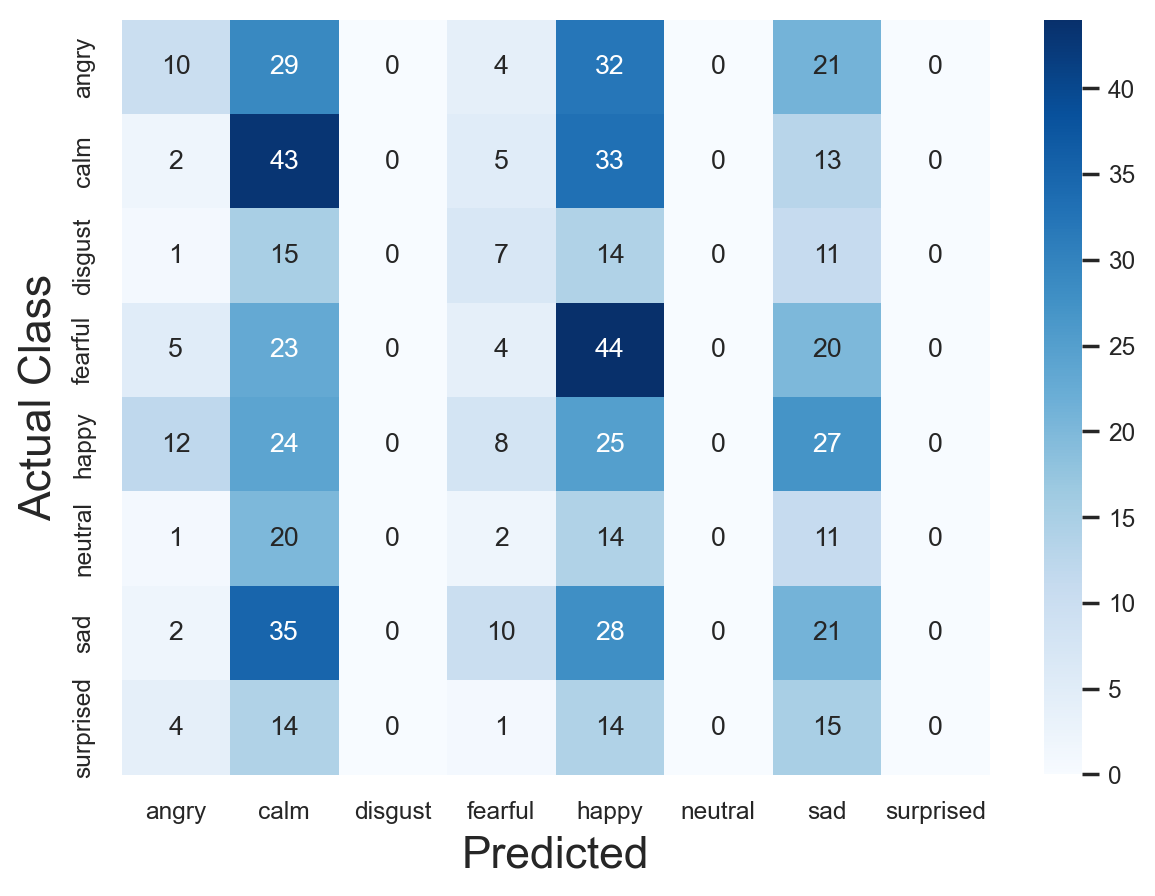

In [31]:
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['figure.dpi']=200
emo_labels=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
sns.set(font_scale=0.8)
conf_m= confusion_matrix(y_test, clf_R.predict(X_test_transform))
sns.heatmap(conf_m, annot=True, xticklabels=emo_labels, yticklabels=emo_labels,cmap='Blues' )
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Actual Class", fontsize=16)
plt.show()

In [23]:
Mrocket = MiniRocket(num_kernels=1000)
Mrocket.fit(x_trainEmb)
X_train_transform = Mrocket.transform(x_trainEmb)
X_test_transform=Mrocket.transform(x_testEmb)

clf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
clf_R.fit(X_train_transform, y_train)

print(classification_report(y_test, clf_R.predict(X_test_transform)))

              precision    recall  f1-score   support

       angry       0.22      0.18      0.20        96
        calm       0.24      0.42      0.30        96
     disgust       0.00      0.00      0.00        48
     fearful       0.15      0.11      0.13        96
       happy       0.15      0.24      0.18        96
     neutral       0.00      0.00      0.00        48
         sad       0.17      0.27      0.21        96
   surprised       0.00      0.00      0.00        48

    accuracy                           0.19       624
   macro avg       0.12      0.15      0.13       624
weighted avg       0.14      0.19      0.16       624



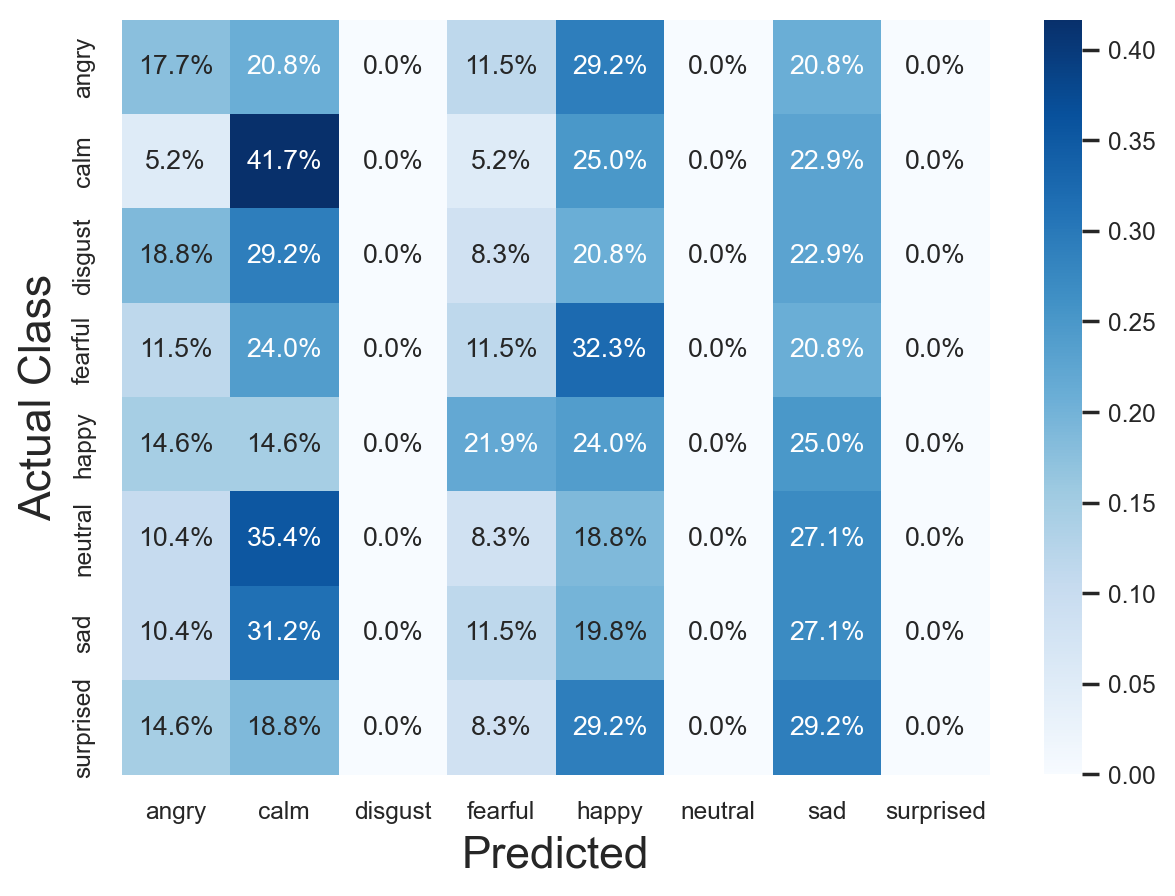

In [24]:
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['figure.dpi']=200
emo_labels=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
sns.set(font_scale=0.8)
conf_m= confusion_matrix(y_test, clf_R.predict(X_test_transform), normalize='true')
sns.heatmap(conf_m, annot=True, xticklabels=emo_labels, yticklabels=emo_labels, fmt='.1%',cmap='Blues' )
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Actual Class", fontsize=16)
plt.show()

### sax big


In [10]:
x_train=np.load('X_train_sax_big.npy')
x_test=np.load('X_test_sax_big.npy')


x_train_saxbEmb=x_train.reshape(1828,1,1000)
x_test_saxbEmb=x_test.reshape(624,1,1000)

In [11]:
train_accR=[]
test_accR=[]

i=1
for kernels in np.linspace(10,10000,25):
    rocket=Rocket(num_kernels=kernels)
    rocket.fit(x_train_saxbEmb)
    print(f'{i}/25 rocket fit done                 {kernels} kernels')
    X_trainsformR=rocket.transform(x_train_saxbEmb)
    X_testformR=rocket.transform(x_test_saxbEmb)
    print(f'{i}/25 rocket transformations done')
    clf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
    clf_R.fit(X_trainsformR, y_train)
    print(f'{i}/25 model fit done')
    train_accR.append(accuracy_score(y_test, clf_R.predict(X_testformR)))
    test_accR.append(accuracy_score(y_train,clf_R.predict(X_trainsformR)))
    print(f'{i}/25 results appending done\n---------------------------------------------------')
    i+=1

1/25 rocket fit done                 10.0 kernels
1/25 rocket transformations done
1/25 model fit done
1/25 results appending done
---------------------------------------------------
2/25 rocket fit done                 426.25 kernels
2/25 rocket transformations done
2/25 model fit done
2/25 results appending done
---------------------------------------------------
3/25 rocket fit done                 842.5 kernels
3/25 rocket transformations done
3/25 model fit done
3/25 results appending done
---------------------------------------------------
4/25 rocket fit done                 1258.75 kernels
4/25 rocket transformations done
4/25 model fit done
4/25 results appending done
---------------------------------------------------
5/25 rocket fit done                 1675.0 kernels
5/25 rocket transformations done
5/25 model fit done
5/25 results appending done
---------------------------------------------------
6/25 rocket fit done                 2091.25 kernels
6/25 rocket transformati

In [12]:
## MiniRocket

train_accMR =[0]
test_accMR=[0]

i=2
for k in my_kernels[1:]:
    minirocket=MiniRocket(num_kernels=k)
    minirocket.fit(x_train_saxbEmb)
    print(f'{i}/25 minirocket fit done                      {k} kernels')
    
    X_trainsformMR=minirocket.transform(x_train_saxbEmb)
    X_testformMR=minirocket.transform(x_test_saxbEmb)
    print(f'{i}/25 minirocket transformations done')
    
    clf_MR=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
    clf_MR.fit(X_trainsformMR, y_train)
    print(f'{i}/25 model fit done')
    
    test_accMR.append(accuracy_score(y_test, clf_MR.predict(X_testformMR)))
    train_accMR.append(accuracy_score(y_train,clf_MR.predict(X_trainsformMR)))
    print(f'{i}/25 results appending done\n---------------------------------------------------')
    i+=1

2/25 minirocket fit done                      426 kernels
2/25 minirocket transformations done
2/25 model fit done
2/25 results appending done
---------------------------------------------------
3/25 minirocket fit done                      842 kernels
3/25 minirocket transformations done
3/25 model fit done
3/25 results appending done
---------------------------------------------------
4/25 minirocket fit done                      1258 kernels
4/25 minirocket transformations done
4/25 model fit done
4/25 results appending done
---------------------------------------------------
5/25 minirocket fit done                      1675 kernels
5/25 minirocket transformations done
5/25 model fit done
5/25 results appending done
---------------------------------------------------
6/25 minirocket fit done                      2091 kernels
6/25 minirocket transformations done
6/25 model fit done
6/25 results appending done
---------------------------------------------------
7/25 minirocket fit do

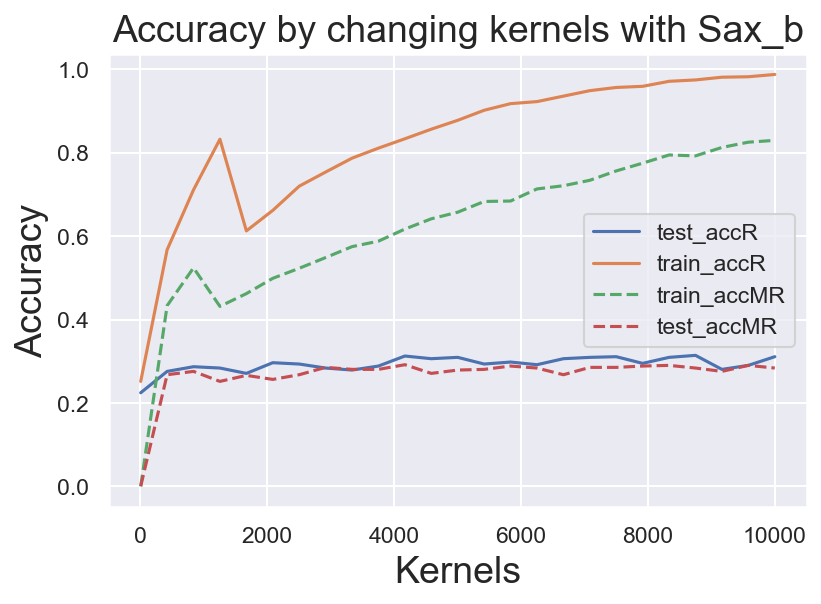

In [13]:
plt.rcParams['figure.dpi']=150
sns.set()
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.plot(my_kernels,train_accR, label='test_accR')
plt.plot(my_kernels,test_accR, label='train_accR')
plt.plot(my_kernels,train_accMR, label='train_accMR' , linestyle="--")
plt.plot(my_kernels, test_accMR, label='test_accMR', linestyle="--")
plt.xlabel('Kernels' )
plt.ylabel('Accuracy')
plt.title('Accuracy by changing kernels with Sax_b')
plt.legend()

In [27]:


rocket = Rocket(num_kernels=1000)
rocket.fit(x_trainEmb)
X_train_transform = rocket.transform(x_trainEmb)
X_test_transform=rocket.transform(x_testEmb)

clf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
clf_R.fit(X_train_transform, y_train)

print(classification_report(y_test, clf_R.predict(X_test_transform)))



              precision    recall  f1-score   support

       angry       0.31      0.48      0.38        96
        calm       0.33      0.68      0.44        96
     disgust       0.21      0.12      0.16        48
     fearful       0.16      0.07      0.10        96
       happy       0.23      0.21      0.22        96
     neutral       0.06      0.02      0.03        48
         sad       0.19      0.17      0.18        96
   surprised       0.32      0.15      0.20        48

    accuracy                           0.27       624
   macro avg       0.23      0.24      0.21       624
weighted avg       0.23      0.27      0.23       624



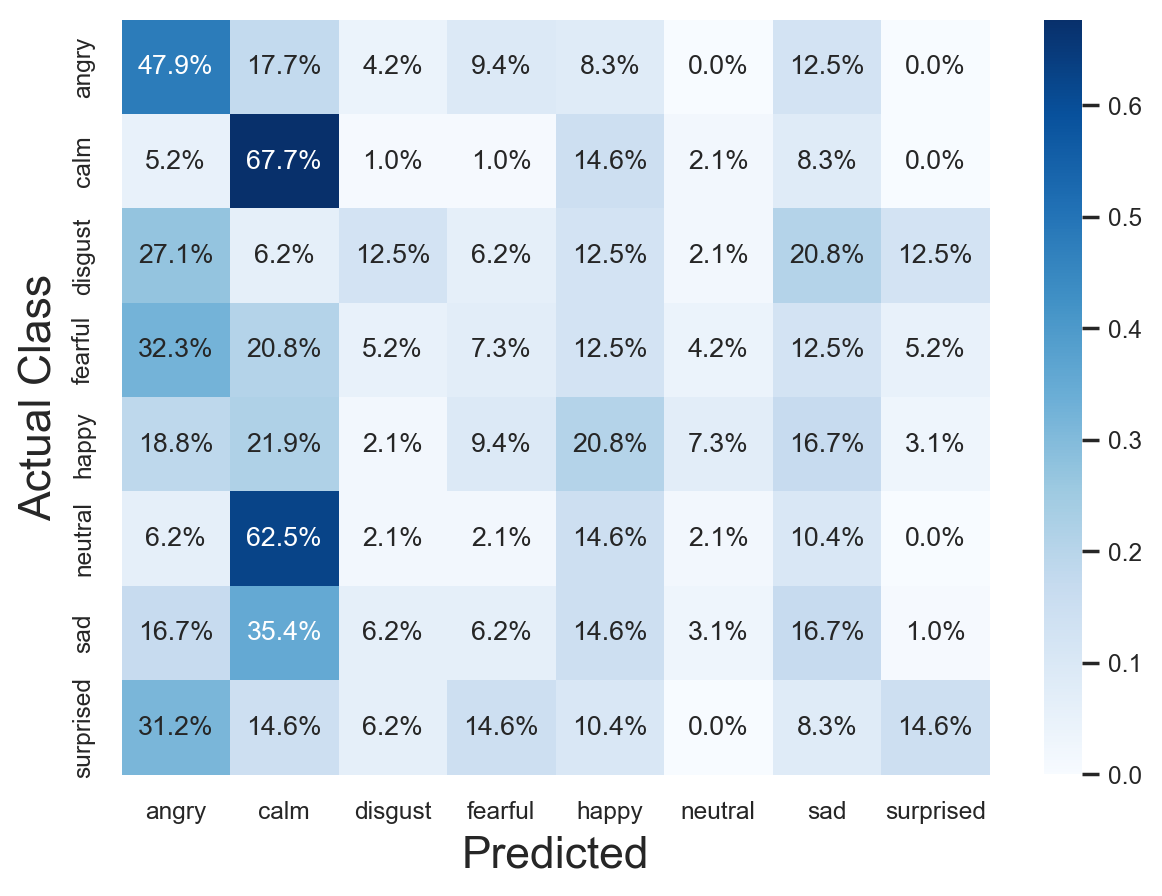

In [28]:
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams['figure.dpi']=200
emo_labels=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
sns.set(font_scale=0.8)
conf_m= confusion_matrix(y_test, clf_R.predict(X_test_transform), normalize='true')
sns.heatmap(conf_m, annot=True, xticklabels=emo_labels, yticklabels=emo_labels, fmt='.1%',cmap='Blues' )
plt.xlabel("Predicted", fontsize=16)
plt.ylabel("Actual Class", fontsize=16)
plt.show()

In [ ]:
Mrocket = MiniRocket(num_kernels=1000)
Mrocket.fit(x_trainEmb)
X_train_transform = Mrocket.transform(x_trainEmb)
X_test_transform=Mrocket.transform(x_testEmb)

clf_R=RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True) 
clf_R.fit(X_train_transform, y_train)

print(classification_report(y_test, clf_R.predict(X_test_transform)))
